## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 9 #

In questa esercitazione è stato affrontato il problema del commesso viaggiatore: $Traveling\space Salesman\space Problem \space(TSP)$.

Questo problema consiste nel visitare un certo numero di città disposte in modo arbitrario con le seguenti condizioni:
* ogni città viene visitata solo una volta;
* l'ultima città visitata deve coincidere con la prima.

Obiettivo del TSP è trovare il percorso più breve che soddisfa le precedenti condizioni.

### esercizio 9.1

Questo problema è stato affrontato implementando un Algoritmo Genetico (GA).
In questo caso il problema è stato applicato a 34 città la cui posizione è stata determinata randomicamente in due differenti configurazioni, la prima in cui le città erano disposte su una circonferenza e la seconda in cui le città erano disposte all'interno di un quadrato. Per questo problema la funzione costo da minimizzare è stata la somma dei quadrati delle distanze $:=L^{(2)}$.

Più facile visualizzazione della struttura dell'algoritmo si trova all'inizio del file c++ presente nella seguente cartella, ma si può riassumere così:

si definiscono due variabili per indicare le due coordinate di ogni città: $x$ e $y$. Ogni città è rappresentata da un vettore della std::vector<città> $(x,y)$. una lista di città è un vector<> che ha per ogni componente una città a partire dalla prima posizione, perché alla posizione 0 vi è $L^{(2)}$. una Popolazione è un vector<> che ha per ogni componente una lista di città.

Dopo la creazione del un codice per rappresentare al meglio il problema sono stati implementati degli operatori genetici di mutazione e di riproduzione oltre ad operatori per la selezione riproduttiva e per il calcolo e l'ordinamento secondo fitness. Le mutazioni non interessano il primo elemento della lista, così da non avere possibilità di modificare la condizione di partenza sempre dalla solita città e inoltre al calcolo del cammino viene aggiunto in ultimo il ritorno al primo elemento della lista. 

Le mutazioni sono di diversi tipi:
* mescolamento casuale;
* Permutazioni due città in modo casuale;
* Permutazioni di m elementi contigui con altri m elementi contigui della lista
* inversione di m elementi contigui
* spostamento di n posizioni di m elementi contigui

Oltre le mutazioni sono presenti come già annunciato in precedenza un operatore di selezione che seleziona individui da riprodurre con maggiore probabilità di estrarre individui con fitness maggiore (per fare questo dopo aver ordinato la popolazione in modo da avere alle prime posizioni gli individui migliori si estrae un numero casuale secondo una distribuzione di probabilità non uniforme ma maggiore in prossimità dello zero, in questo caso: $j = Ndim\times r^3$ con Ndim numero di individui nella popolazione e r numero casuale uniforme $r\in[0,1)$),
e un operatore di crossover per la riproduzione degli individui. 
Quest'ultimo applicato a due liste di città sceglie randomicamente una posizione in cui interrompere tutti e due le liste (la posizione è uguale per entrambe) e poi riordina le città dopo quella posizione secondo l'ordine in cui appaiono nell'altra lista.

Quando si genera una nuova popolazione a partire da quella vecchia vengono sistematicamente selezionati due individui a cui si applica una probabilità di effettuare il crossover, in questo caso per entrambe le distribuzioni di città del $75$%, e sia che venga effettuato il crossover sia che non venga effettuato(e quindi i due individui non si mescolano ma rimangono invariati) vengono applicate le mutazioni, ogni mutazione ha la sua probabilità di avvenire.

#### CIRCONFERENZA

Per questa disposizione di città sono stati usati 500 individui con 500 generazioni, con tasso di mutazione del $10$%.

Sono riportati di seguito i grafici con i risultati ottenuti per questa configurazione, il primo rappresenta l'andamento mediato sulla prima metà della popolazione e dell'individuo migliore della funzione costo $L^{(2)}$, il terzo e il quarto mostrano il miglior cammino della prima popolazione e il migliore dell'ultima e per concludere c'è una rappresentazione dell'evoluzione del miglior cammino all'aumentare delle generazioni.

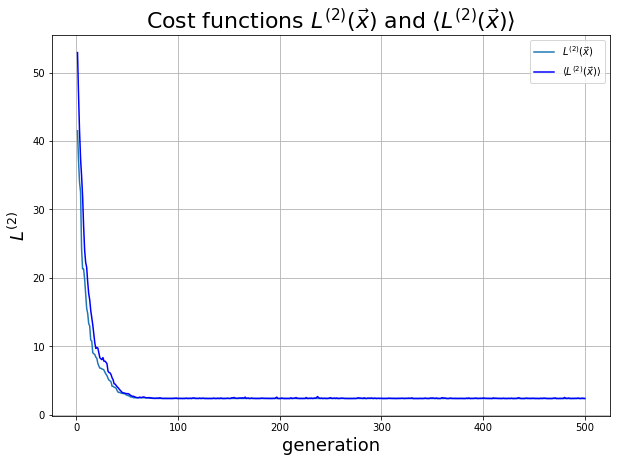

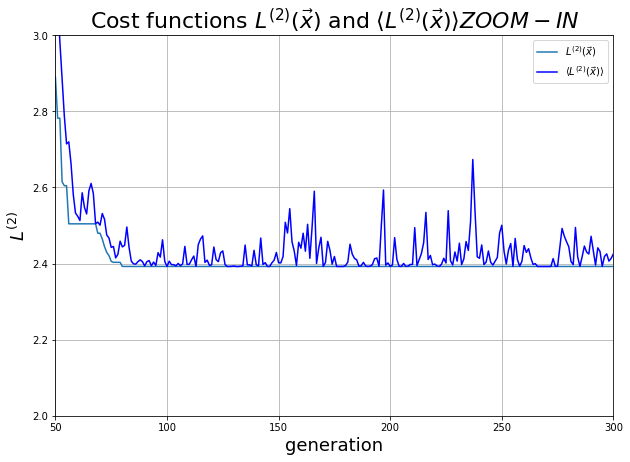

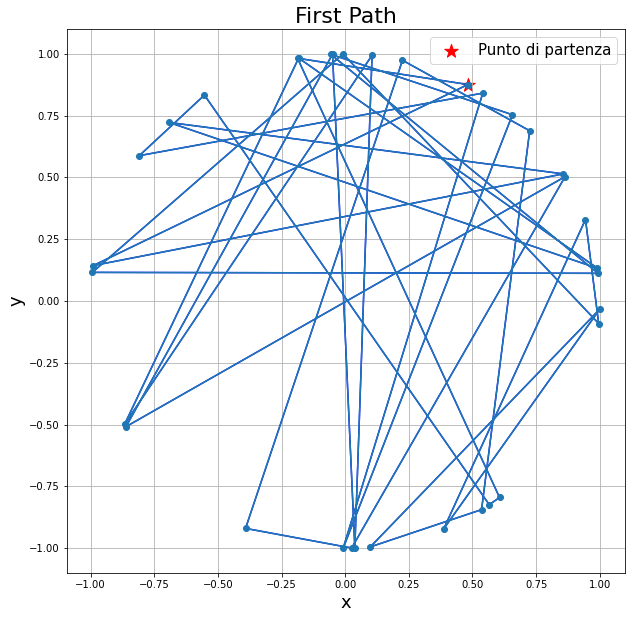

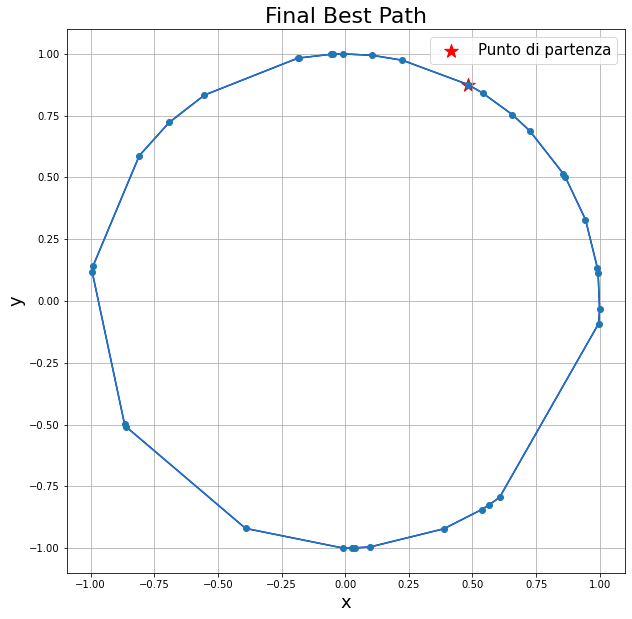

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f = np.loadtxt("best_L2_Circle.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("av_L2_Circle.dat", usecols=(0,1), unpack='true',  delimiter='\t')
plt.figure(figsize=(10, 7))
plt.plot(x,f, label= r"$L^{(2)}(\vec{x})$")
plt.plot(ax,af, label=r"$\langle L^{(2)}(\vec{x}) \rangle $" , color = "blue")
plt.xlabel('generation', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title(r"Cost functions $L^{(2)}(\vec{x})$ and $\langle L^{(2)}(\vec{x}) \rangle $", fontsize=22)
plt.legend(loc ="best")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(x,f, label= r"$L^{(2)}(\vec{x})$")
plt.plot(ax,af, label=r"$\langle L^{(2)}(\vec{x}) \rangle $" , color = "blue")
plt.xlabel('generation', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title(r"Cost functions $L^{(2)}(\vec{x})$ and $\langle L^{(2)}(\vec{x}) \rangle ZOOM-IN$", fontsize=22)
plt.legend(loc ="best")
plt.xlim(50,300)
plt.ylim(2,3)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
x, f = np.loadtxt("Circle_first_Path_0.dat", usecols=(1,2), unpack='true',  delimiter='\t')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
plt.title('First Path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
x, f = np.loadtxt("Circle_final_Path_0.dat", usecols=(1,2), unpack='true',  delimiter='\t')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=200, label='Punto di partenza')
plt.title('Final Best Path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()

Si può notare nel secondo grafico come il miglior cammino venga trovato ben prima della fine della simulazione, prima della generazione 100, e il cammino medio invece sia naturalmente maggiore o almeno uguale.

<img src="circle.gif" alt="circle.gif" width="800"/>

#### QUADRATO

In questo caso il numero di individui è sempre 500 ma le generazioni sono state aumentate a 600. Cambiamento rilevante però è quello effettuato alla probabilità di mutazione. Infatti è stata duplicata, $20$%, rispetto al caso precedente, in quanto in questa configurazione aumentava di molto la presenza di minimi locali e aumentando il tasso di mutazione è stato possibile arrivare ad una configurazione finale almeno ragionevole (infatti è normale aspettarsi un percorso senza intersezioni).

Come nel caso precedente sono riportati di seguito i grafici riassuntivi dei risultati: il primo rappresenta l'andamento mediato sulla prima metà della popolazione e dell'individuo migliore della funzione costo $L^{(2)}$, il terzo e il quarto mostrano il miglior cammino della prima popolazione e il migliore dell'ultima e per concludere c'è una rappresentazione dell'evoluzione del miglior cammino all'aumentare delle generazioni.

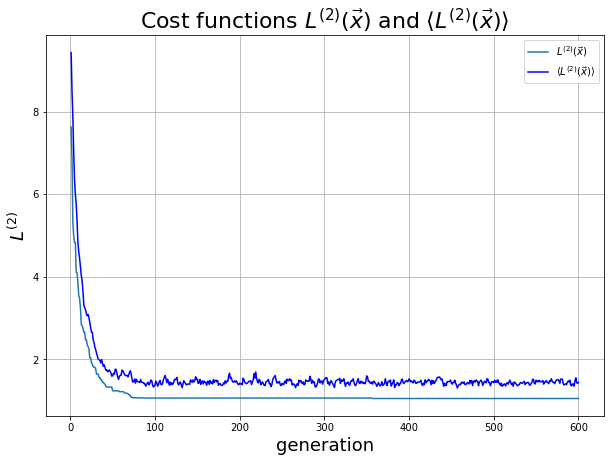

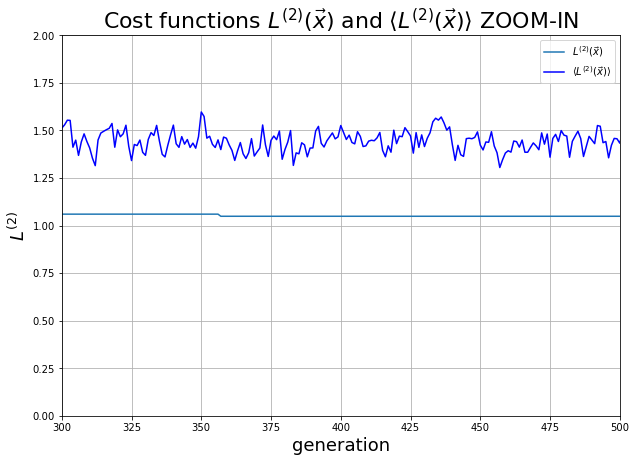

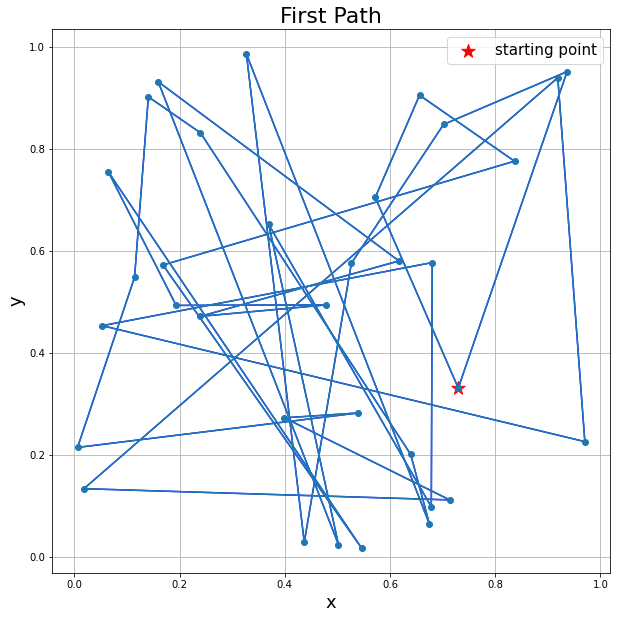

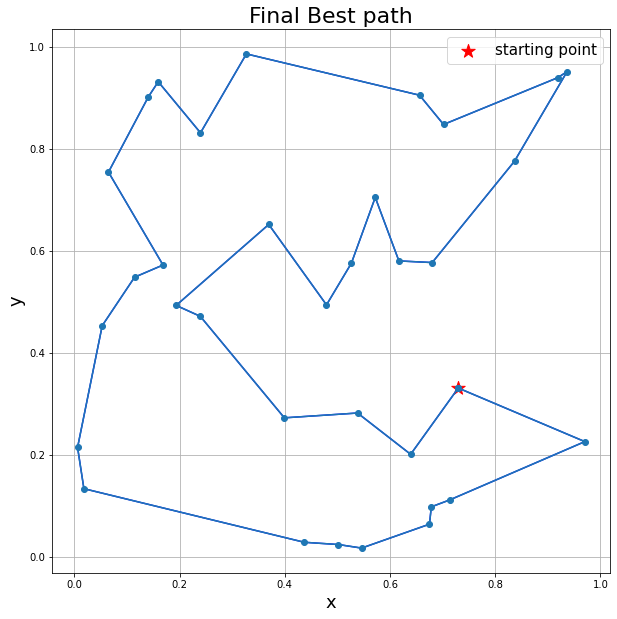

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f = np.loadtxt("best_L2_Square.dat", usecols=(0,1), unpack='true',  delimiter='\t')
ax, af = np.loadtxt("av_L2_Square.dat", usecols=(0,1), unpack='true',  delimiter='\t')
plt.figure(figsize=(10, 7))
plt.plot(x,f, label= r"$L^{(2)}(\vec{x})$")
plt.plot(ax,af, label=r"$\langle L^{(2)}(\vec{x}) \rangle $" , color = "blue")
plt.xlabel('generation', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title(r"Cost functions $L^{(2)}(\vec{x})$ and $\langle L^{(2)}(\vec{x}) \rangle $", fontsize=22)
plt.legend(loc ="best")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(x,f, label= r"$L^{(2)}(\vec{x})$")
plt.plot(ax,af, label=r"$\langle L^{(2)}(\vec{x}) \rangle $" , color = "blue")
plt.xlabel('generation', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title(r"Cost functions $L^{(2)}(\vec{x})$ and $\langle L^{(2)}(\vec{x}) \rangle $ ZOOM-IN", fontsize=22)
plt.legend(loc ="best")
plt.xlim(300,500)
plt.ylim(0,2)
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 10))
x, f = np.loadtxt("Square_first_Path_0.dat", usecols=(1,2), unpack='true',  delimiter='\t')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=200, label='starting point')
plt.title('First Path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
x, f = np.loadtxt("Square_final_Path_0.dat", usecols=(1,2), unpack='true',  delimiter='\t')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=200, label='starting point')
plt.title('Final Best path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()

<img src="square.gif" alt="square.gif" width="800"/>

E' molto interessante notare come nel primo grafico sembra che si arrivi al migliore cammino trovato entro le 100 generazioni, ma nel secondo grafico è evidenziato un piccolo salto dopo la generazione 300. L'algoritmo infatti ha fatto fatica a uscire da quel minimo locale e ha impiegato parecchio tempo per riuscirci, ciò fa riflettere sul caso che l'ultimo percorso trovato può non essere un minimo assoluto ma un altro minimo locale dal quale è possibile che non si riesca ad uscire. La fatica ad uscire dal minimo locale è rappresentata bene nell'animazione grafica, dove si può vedere come il miglior percorso rimanga lo stesso per un po' e sembra molto buono, per poi all'ultimo cambiare di pochissimo e trovarne uno ancora migliore. Oltre a ciò si può notare come in questo caso l'andamento di $<L^{(2)}>$ sia molto distaccato dal minimo e con oscillazioni maggiori, dovuto al fatto che il tasso di mutazione è raddoppiato.